<h1>Deep Learning with Python: Neural Networks</h1>

In [1]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap

2023-07-31 13:32:10.188773: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 13:32:13.041209: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 13:32:13.051013: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 13:32:34.410393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


<h3>Create a Simplest Artificial Neural Networks (ANN)</h3>
<p>ANN are made of layers with an input and an output dimension.
The layers can be grouped as:
<ul>
<li>Input layer has the job to pass the input vector to the Neural Network. </li>
<li>Hidden layers represent the intermediary nodes</li>
<li>Output layer that returns the final output of the Neural Network</li>
</ul>
The simplest form of ANN is the <b>Perceptron</b>, a model with one layer only.</p>

<h3>Deep Neural Networks</h3>
<p>Generally speaking, “Deep” Learning applies when the algorithm has at least 2 hidden layers (so 4 layers in total including input and output).</p>


<h4>Model Design</h4>
<p>The easiest way to build a Neural Network with <i>TensorFlow</i> is with the <i>Sequential</i> class of <i>Keras</i></p>

In [2]:
model = models.Sequential(
    name="Perceptron", 
    layers=[    layers.Dense(             #a fully connected layer
                             name="dense",
                             input_dim=3,        #with 3 features as the input
                             units=1,            #and 1 node because we want 1 output
                             activation='linear' #f(x)=x
                             )
            ]
    )
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<p>The summary function provides a snapshot of the structure and the size (in terms of parameters to train). In this case, we have just 4 (3 weights and 1 bias), so it’s pretty lite.</p>

<h4>Define Custom <i>activation function</i></h4>

In [3]:
# define the function
import tensorflow as tf

def binary_step_activation(x):
    ##return 1 if x>0 else 0 
    return K.switch(x>0, tf.math.divide(x,x), tf.math.multiply(x,0))

# build the model
model = models.Sequential(name="Perceptron", layers=[
      layers.Dense(             
          name="dense",
          input_dim=3,        
          units=1,            
          activation=binary_step_activation
      )
])
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None)              4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h3> Move from the Perceptron to a Deep Neural Network</h3>
<p>
<ul>
<li><b>How many layers?</b> "try different variants and see what works"</li>
<ul>
It is usually recommened to start with
<li> 2 Dense hidden layers with Dropout, a technique that reduces overfitting by randomly setting inputs to 0</li> 
<li>Hidden layers are useful to overcome the non-linearity of data, so if you don’t need non-linearity then you can avoid hidden layers.</li>
</ul>
<li><b>How many neurons?</b> rule of thumb is (number of inputs + 1 output)/2</li>
<li><b>How many neurons?</b> the most used one is ReLU, a piecewise linear function that returns the output only if it’s positive</li>
<ul>
<li><i>ReLU</i> function is mainly used for hidden layers</li> 
<li><i>linear</i> function is suited for regression problems</li> 
<li><i>Sigmoid</i> is frequently used for classification</li>
</ul>
</ul>
</p>

In [4]:
n_features = 10

model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h4>Recommendation on the Class to use from Keras</h4>

<ul>
<li>The Input layer needs to be specified while in the <i>Sequential</i> class it’s implied in the input dimension of the first Dense layer.</li>
<li>The layers are saved like objects and can be applied to the outputs of other layers like: <code>output = layer(…)(input)</code></li>
</ul>
This is how you can use the Model class to build our Perceptron and DeepNN

In [5]:
# Perceptron
inputs = layers.Input(name= "input", shape=(3,))
outputs = layers.Dense(name ="output", units=1, activation='linear')(inputs)

pmodel = models.Model(inputs=inputs, outputs=outputs, name="Perceptron")
pmodel.summary()


Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:

#DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features))

### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name='drop1', rate=0.2)(h1)

### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name='drop2', rate=0.2)(h2)

### layer output
outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)

model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")

model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10)]              0         
                                                                 
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 


 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h2>Visualization</h2>
<p>The following function will plot the structure of an Artificial Neural Network from its <code>TensorFlow</code> model</p>

In [7]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

Let’s try it out on our 2 models:

<h4>Visualise the Perceptron Model</h4>

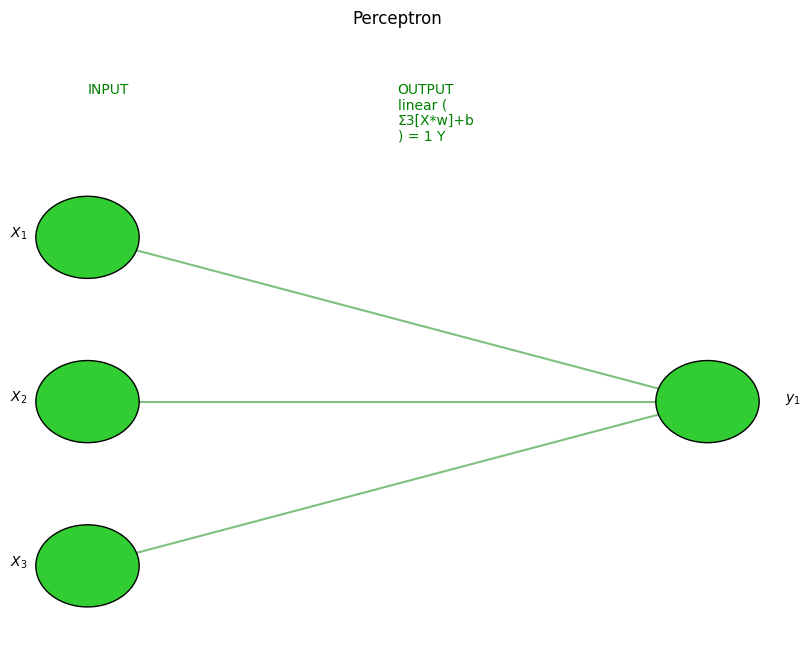

In [8]:
visualize_nn(pmodel, description=True, figsize=(10,8))

<h4>Visualise the DeepNN Model</h4>

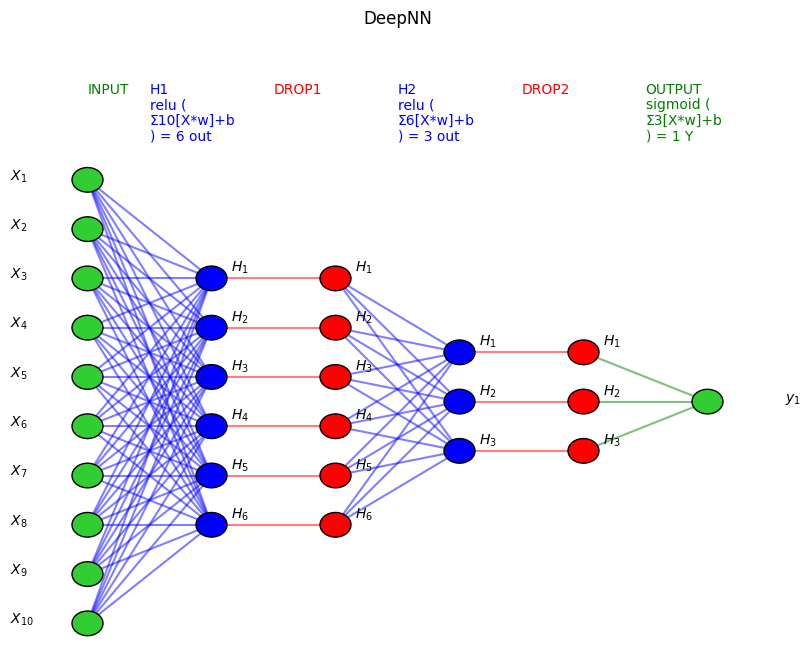

In [9]:
visualize_nn(model, description=True, figsize=(10,8))

<h2>Display Complicated Models with TensorFlow </h2>

In [20]:
import os

dot_img_file = os.path.join(os.getcwd(), 'model_1.png')
utils.plot_model(model, to_file=dot_img_file, 
                 show_shapes=True, 
                 show_layer_names=True,
                 show_layer_activations =True,
                 show_trainable=True)   # Displays 'T' when the layer is trainable and 'NT' when it is not trainable. 
print(f"Plot saved: {dot_img_file}")

Plot saved: /mnt/c/Restech/Learning/DeepLearning_Py_TensorFlow_Keras/model_1.png


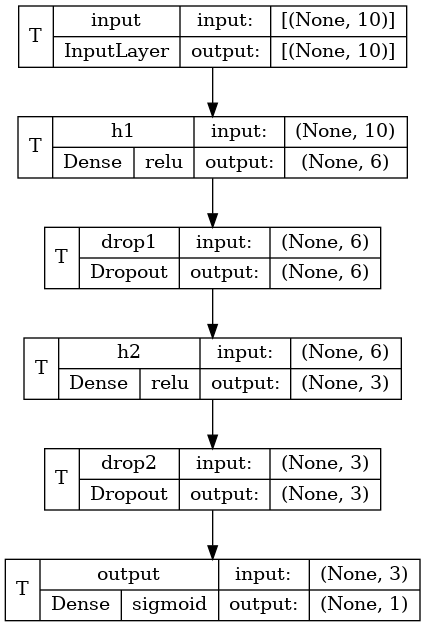

In [21]:
from IPython.display import Image 
Image('model_1.png')